# HEART DISEASE PREDICTION

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

## Load Dataset

In [2]:
df = pd.read_csv("heart_2020_cleaned.csv")
print("Dataset Shape:", df.shape)

Dataset Shape: (319795, 18)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [5]:
label = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = label.fit_transform(df[col])

## Correlation Heatmap:

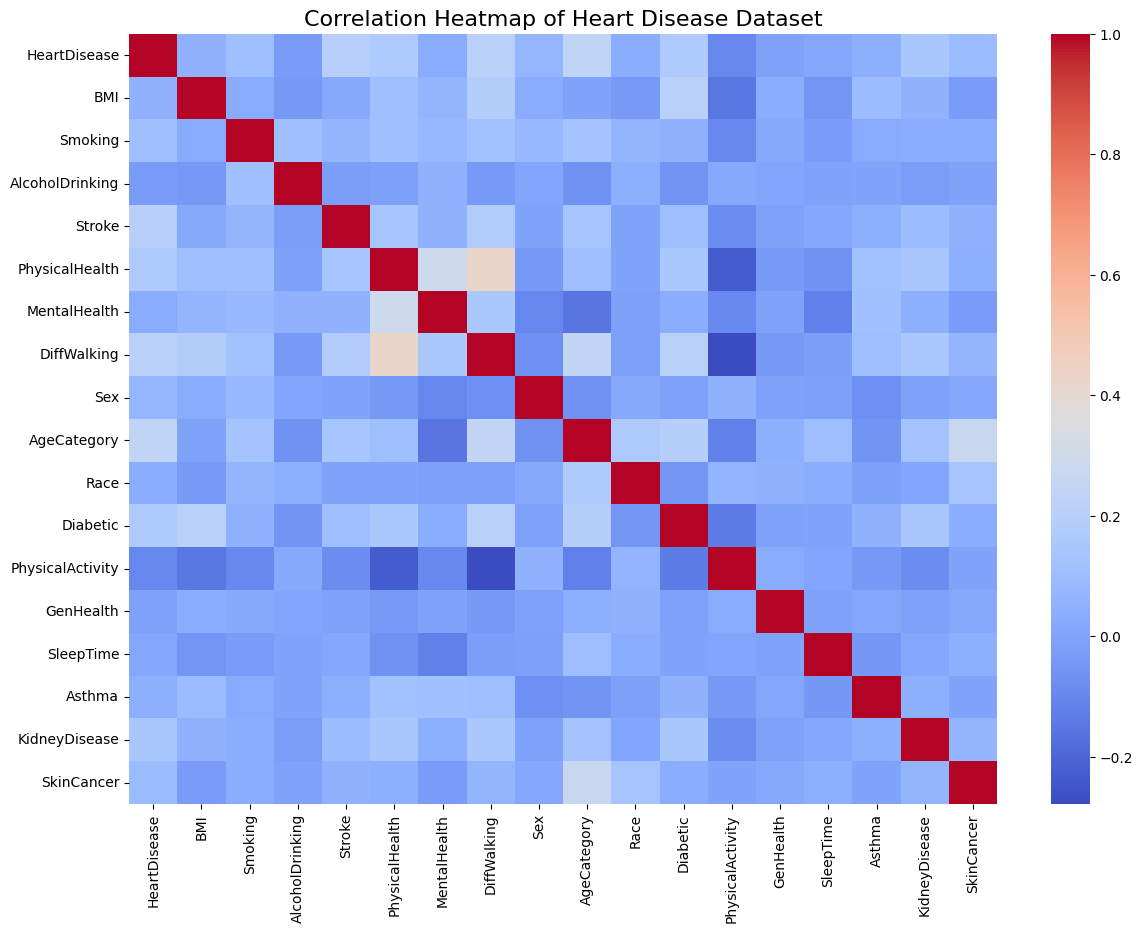

In [6]:

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Heart Disease Dataset", fontsize=16)
plt.show()

## Split the dataset into trained and tested:

In [7]:
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## SCALING:

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## SMOTE (Handle Imbalanced Data):

In [12]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [15]:
sm = SMOTE(sampling_strategy=0.5, random_state=42)
X_lr_res, y_lr_res = sm.fit_resample(X_train_scaled, y_train)


## TRAINING MODELS:

### LOGISTIC REGRESSION:

In [16]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_lr_res, y_lr_res)
lr_pred = log_reg.predict(X_test_scaled)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("\nClassification Report:\n", classification_report(y_test, lr_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, lr_pred))

Logistic Regression:
Accuracy: 0.8409762504104191

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91     58367
           1       0.29      0.54      0.37      5592

    accuracy                           0.84     63959
   macro avg       0.62      0.71      0.64     63959
weighted avg       0.89      0.84      0.86     63959


Confusion Matrix:
 [[50748  7619]
 [ 2552  3040]]


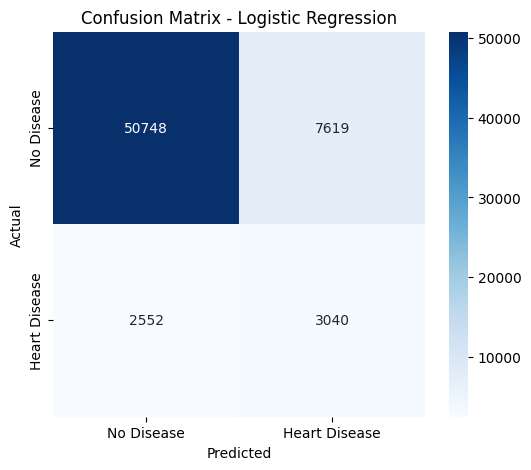

In [17]:
cm = confusion_matrix(y_test, lr_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Heart Disease'], yticklabels=['No Disease', 'Heart Disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


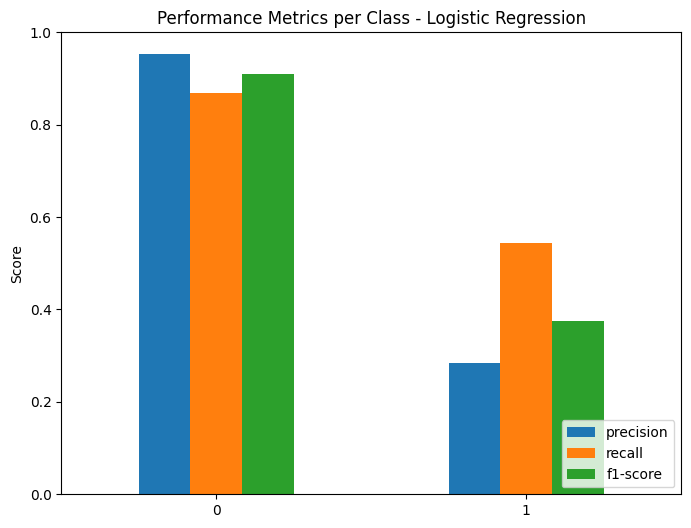

In [18]:
report = classification_report(y_test, lr_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Select only metrics for class 0 and 1
df_metrics = df_report.loc[['0','1'], ['precision', 'recall', 'f1-score']]

# Plot metrics
df_metrics.plot(kind='bar', figsize=(8,6))
plt.title('Performance Metrics per Class - Logistic Regression')
plt.ylabel('Score')
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

In [19]:
## SVM:

In [20]:
svm = LinearSVC(dual=False, random_state=42)
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("\nClassification Report:\n", classification_report(y_test, svm_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, svm_pred))

Accuracy: 0.9134914554636564

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     58367
           1       0.60      0.03      0.06      5592

    accuracy                           0.91     63959
   macro avg       0.76      0.51      0.51     63959
weighted avg       0.89      0.91      0.88     63959


Confusion Matrix:
 [[58256   111]
 [ 5422   170]]


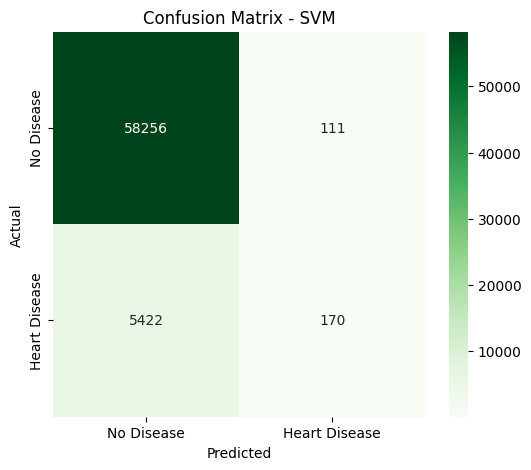

In [21]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d', cmap='Greens', 
            xticklabels=['No Disease', 'Heart Disease'],
            yticklabels=['No Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

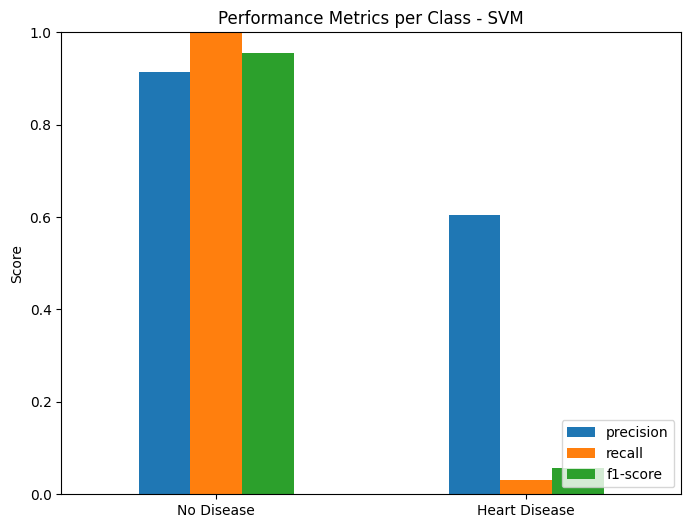

In [22]:
report_svm = classification_report(y_test, svm_pred, output_dict=True)
df_report_svm = pd.DataFrame(report_svm).transpose()

# Select metrics for actual classes
classes = [str(c) for c in y_test.unique()]  # dynamically get classes
df_metrics_svm = df_report_svm.loc[classes, ['precision','recall','f1-score']]
df_metrics_svm.index = ['No Disease', 'Heart Disease']  # optional for readability

# Plot Precision, Recall, F1-Score
df_metrics_svm.plot(kind='bar', figsize=(8,6))
plt.title('Performance Metrics per Class - SVM')
plt.ylabel('Score')
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

In [23]:
print("\n✔ All models trained successfully!")


✔ All models trained successfully!
